# <span style="color:#cd0057; font-weight:bold">⬇️Step 1: Import Essential Libraries</span>
<hr>

In [301]:
import numpy as np              
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns  

# <span style="color:#cd0057; font-weight:bold">🚚Step 2: Load Dataset</span>
<hr>

In [302]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# <span style="color:#cd0057; font-weight:bold">🩺Step03: Understand Data frame</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">About Data frame</span>

| Field        | Description                               |
|--------------|-------------------------------------------|
| N            | Ratio of Nitrogen content in soil         |
| P            | Ratio of Phosphorous content in soil      |
| K            | Ratio of Potassium content in soil        |
| temperature  | Temperature in degree Celsius             |
| humidity     | Relative humidity in %                    |
| ph           | pH value of the soil                      |
| rainfall     | Rainfall in mm                            |



In [303]:
df.shape

(2200, 8)

In [304]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [305]:
describe = df.describe(include='all')
describe.style.background_gradient(cmap='coolwarm')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,nan,nan,nan,nan,nan,nan,nan,22
top,nan,nan,nan,nan,nan,nan,nan,rice
freq,nan,nan,nan,nan,nan,nan,nan,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,nan
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,nan
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,nan
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,nan
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,nan
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,nan


## <span style="color:#0076cd; font-weight:bold">Understand Missing values</span>

In [306]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## <span style="color:#0076cd; font-weight:bold">Find Duplicates</span>

In [307]:
df.duplicated().sum()

0

## <span style="color:#0076cd; font-weight:bold">Understand Object Data</span>

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: xlabel='label'>

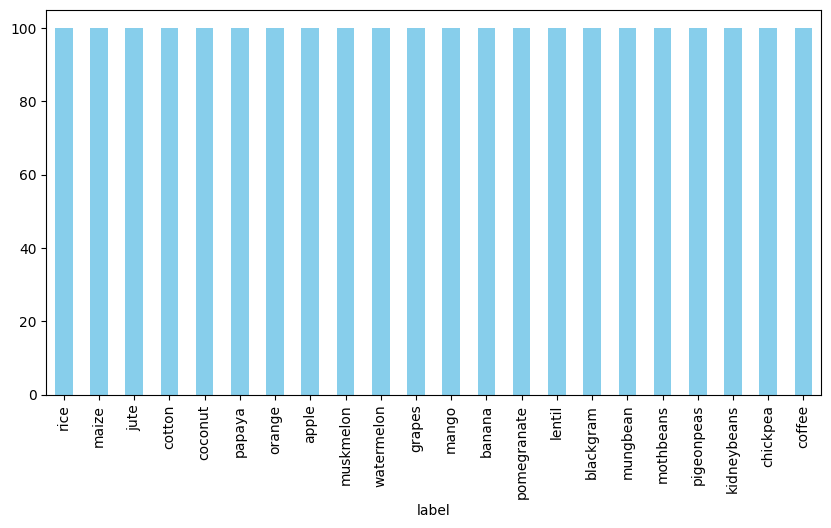

In [309]:
df['label'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

> <span style="color:skyblue"><strong>Note:</strong></span>
> - These lable has perfect value counts (100)
> - Perfect balanced data set


# <span style="color:#cd0057; font-weight:bold">🧹Step 4: Data cleaning</span>
<hr>

> <span style="color:skyblue"><strong>Note:</strong></span>
> - No cleaning needed

# <span style="color:#cd0057; font-weight:bold">❓Step 5: Handle Missing Values</span>
<hr>

> <span style="color:skyblue"><strong>Note:</strong></span>
> - No missing values


# <span style="color:#cd0057; font-weight:bold">🔭Step 6: Handle Outliers</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">cheack outliers</span>

In [310]:
# Finding outliers based on the Inter Quantile Range (IQR)
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate the count of outliers
count_out = df[numeric_cols][(df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))].count()

# Create a DataFrame to display the count of outliers
df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
N,0
P,138
K,200
temperature,86
humidity,30
ph,57
rainfall,100


<hr>

### <span style="color:#00cd16; font-weight:bold">P outliers</span>

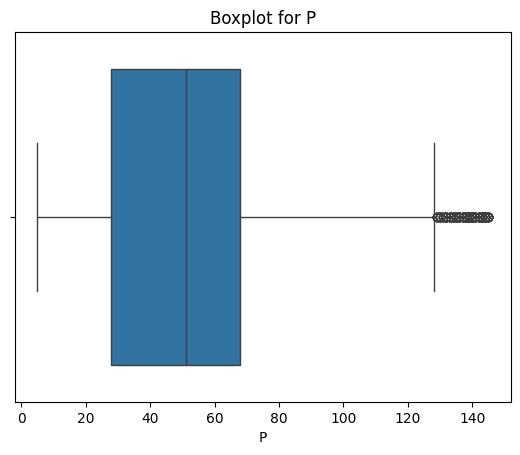

In [311]:
sns.boxplot(x=df['P'])
plt.title('Boxplot for P')
plt.show()

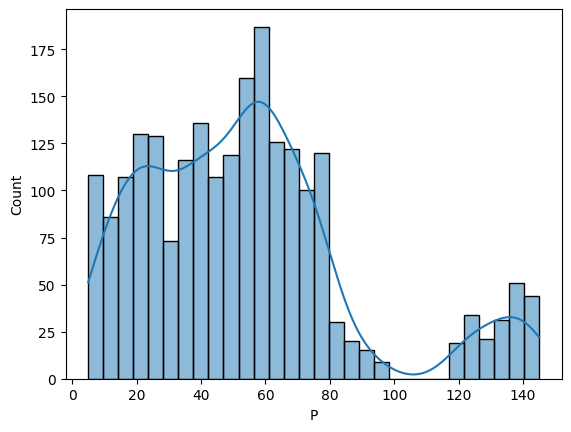

In [312]:
sns.histplot(df['P'], bins=30, kde=True)
plt.show()                                                      

<hr>

### <span style="color:#00cd16; font-weight:bold">K outliers</span>

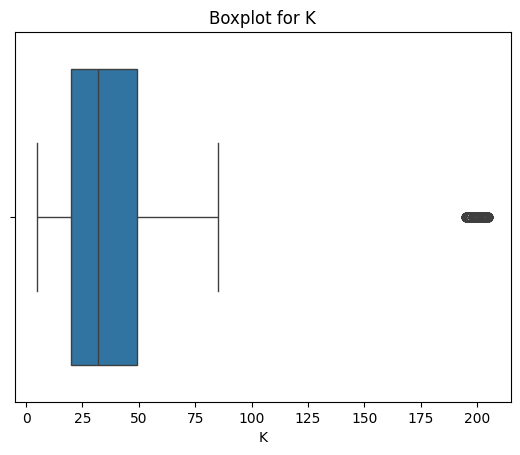

In [313]:
sns.boxplot(x=df['K'])
plt.title('Boxplot for K')
plt.show()

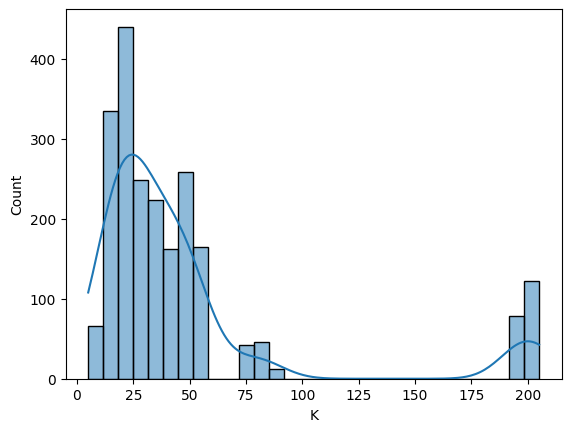

In [314]:
sns.histplot(df['K'], bins=30, kde=True)
plt.show()

<hr>

### <span style="color:#00cd16; font-weight:bold">temperature outliers</span>

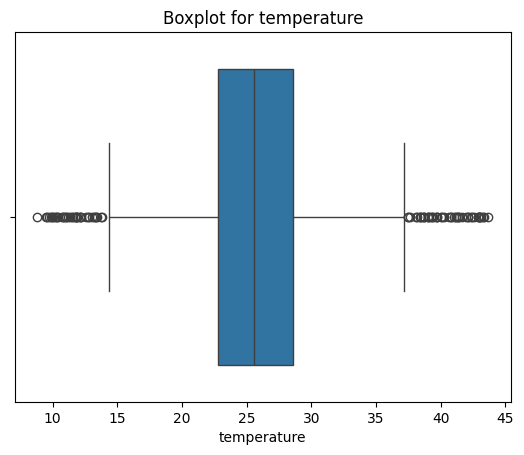

In [315]:
sns.boxplot(x=df['temperature'])
plt.title('Boxplot for temperature')
plt.show()

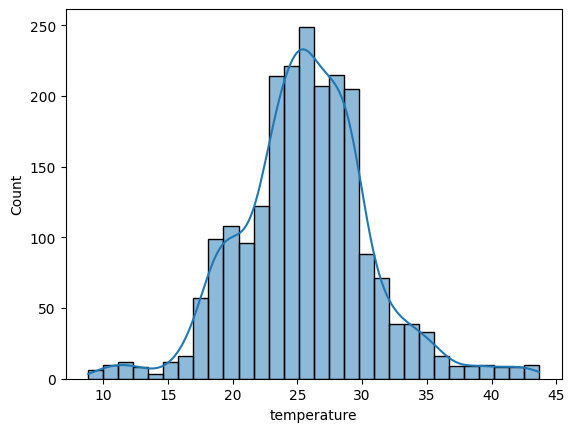

In [316]:
sns.histplot(df['temperature'], bins=30, kde=True)
plt.show()

<hr>

### <span style="color:#00cd16; font-weight:bold">humidity outliers</span>

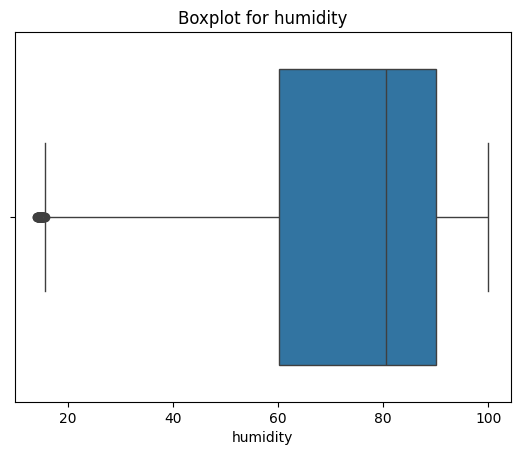

In [317]:
sns.boxplot(x=df['humidity'])
plt.title('Boxplot for humidity')
plt.show()

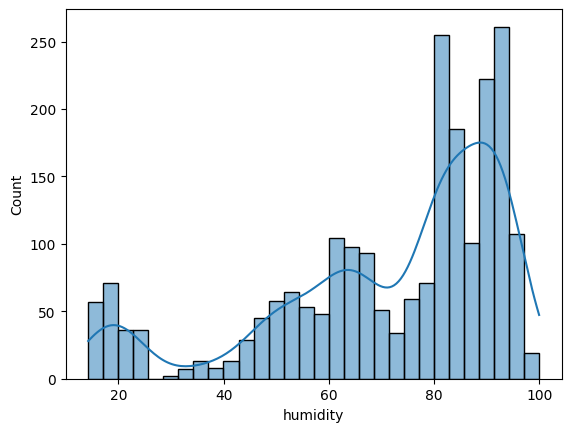

In [318]:
sns.histplot(df['humidity'], bins=30, kde=True)
plt.show()

<hr>

### <span style="color:#00cd16; font-weight:bold">ph outliers</span>

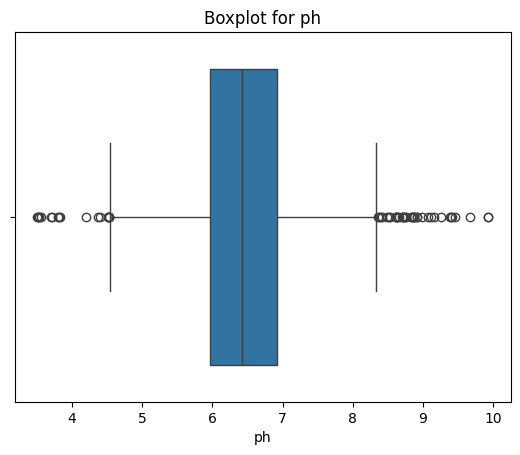

In [319]:
sns.boxplot(x=df['ph'])
plt.title('Boxplot for ph')
plt.show()

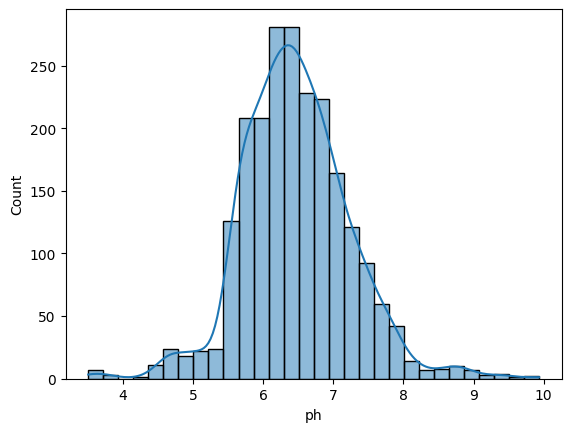

In [320]:
sns.histplot(df['ph'], bins=30, kde=True)
plt.show()

<hr>

### <span style="color:#00cd16; font-weight:bold">rainfall outliers</span>

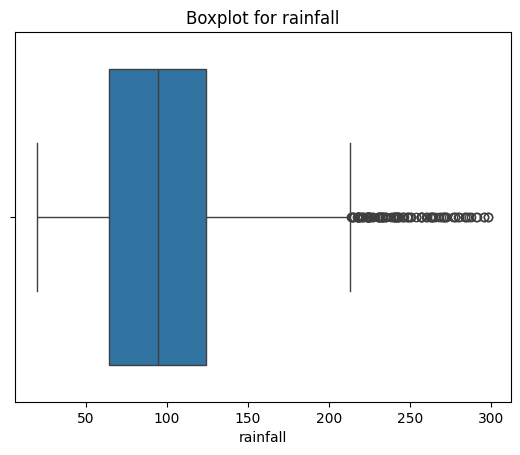

In [321]:
sns.boxplot(x=df['rainfall'])
plt.title('Boxplot for rainfall')
plt.show()

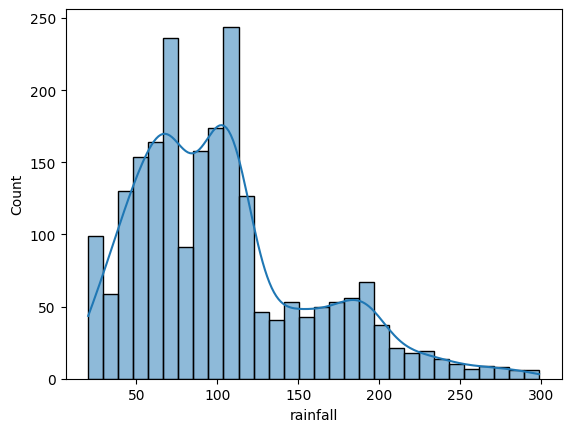

In [322]:
sns.histplot(df['rainfall'], bins=30, kde=True)
plt.show()

> <span style="color:skyblue"><strong>Note:</strong></span>
> - these outliers are important for analisis
> - some outliers are really not outliers

# <span style="color:#cd0057; font-weight:bold">📈Step 7: EDA</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">label-wise Analysis</span>

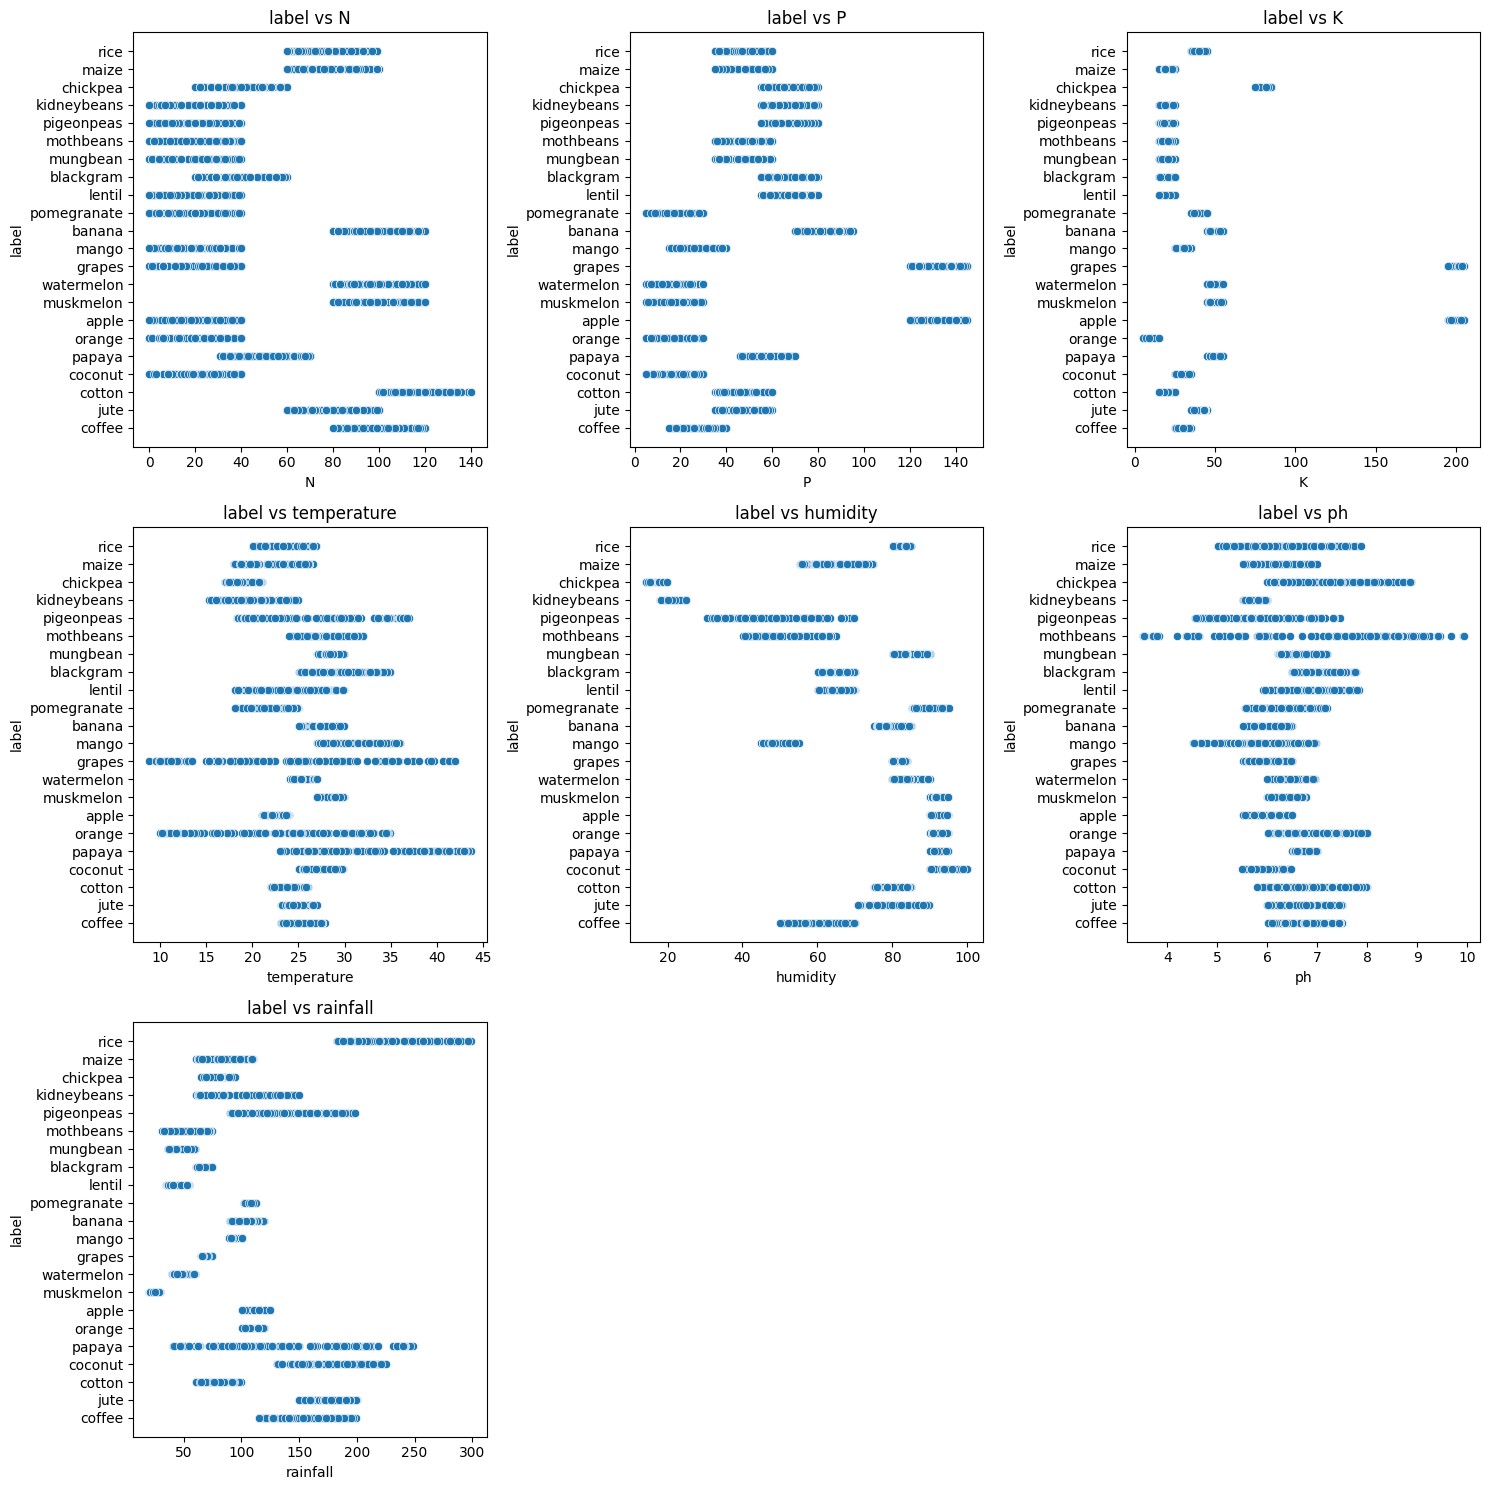

In [323]:
# Select numeric columns (excluding target variable)
target_col = "label"  
numeric_columns = df.select_dtypes(include='number').columns.drop(target_col, errors='ignore')

# Define grid size
num_cols = 3  # Number of columns in the grid
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i])
    axes[i].set_title(f'{target_col} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> <span style="color:skyblue"><strong>Note:</strong></span>
> - As you can see lot of lables has it's own Range of N, P, K, temperatrue, humidity, ph, rain fall values
> - Now i am visualize is more clearly

### <span style="color:#00cd16; font-weight:bold">N by label</span>

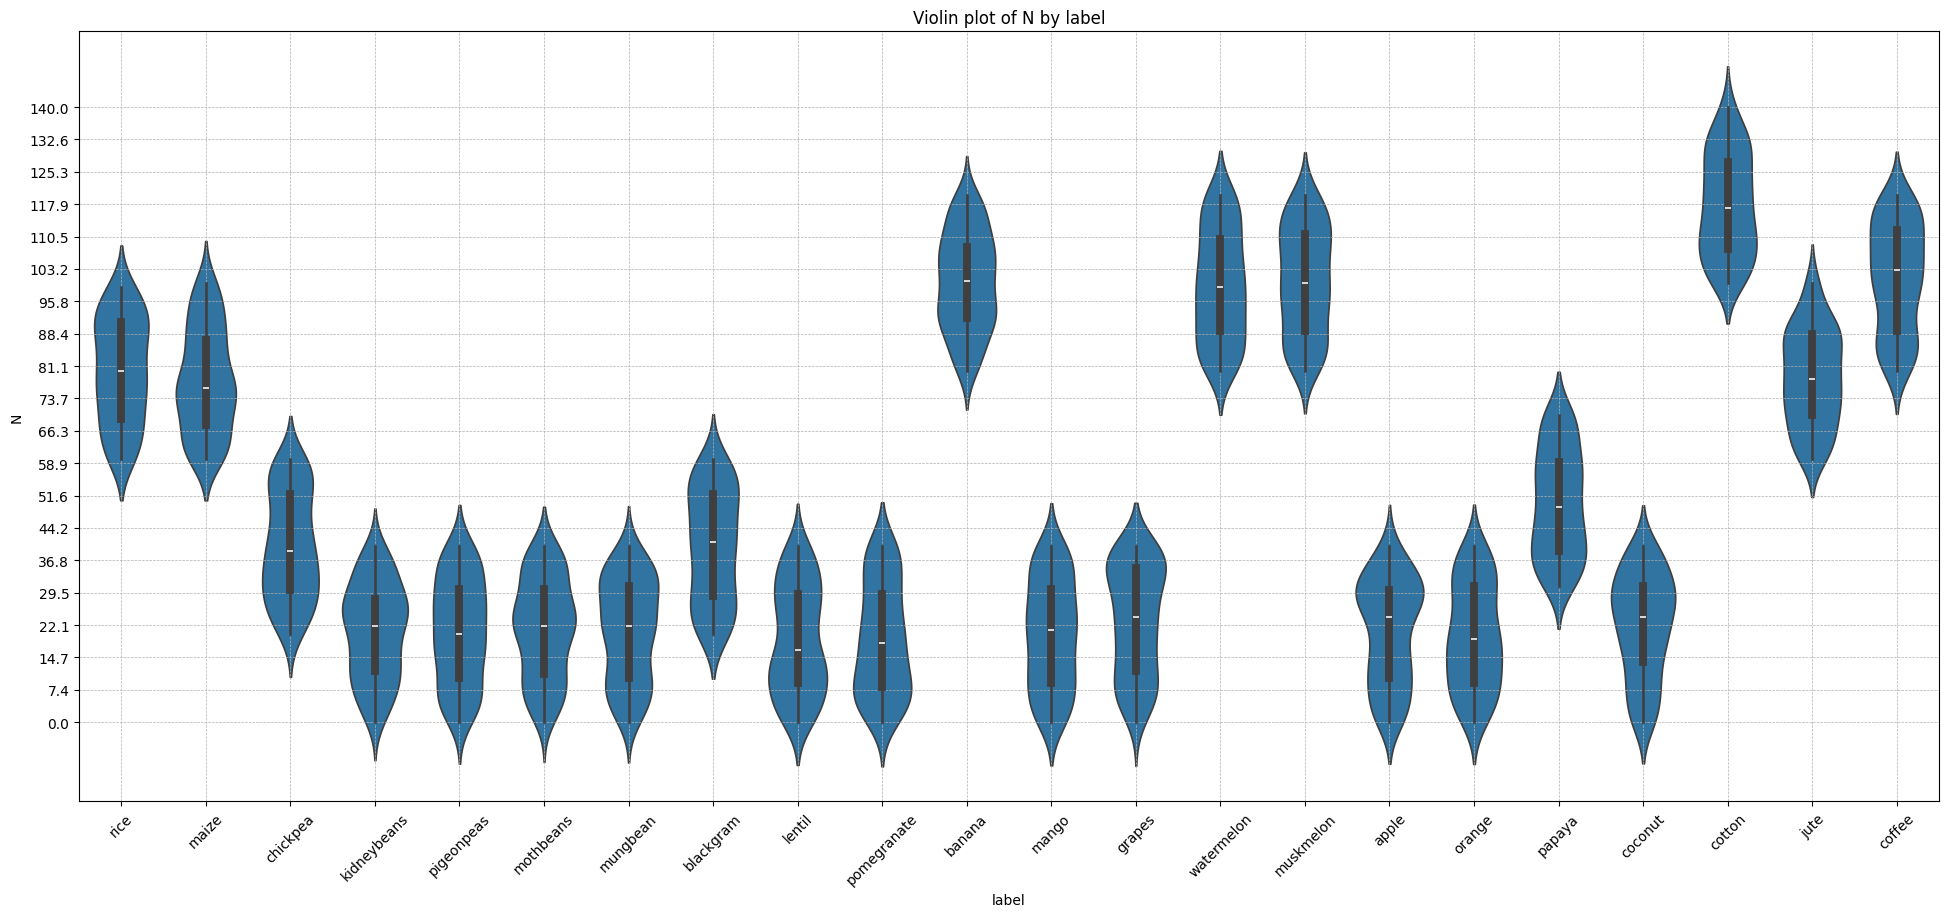

In [324]:
plt.figure(figsize=(24, 10)) 
sns.violinplot(x=df['label'], y=df['N'])
plt.title('Violin plot of N by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['N'].min(), df['N'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see 2  types of labels by N
>  - those types are N is more than 60 and below 60 
>  - 8/22 lables are above 60 (rice , Maize , banana, watermelon , muskmelon , cotton , jute , coffee)
>  - banana muskmelon and watermelon has same N range and also coffe and cotton are also has almost same range

### <span style="color:#00cd16; font-weight:bold">P by label</span>

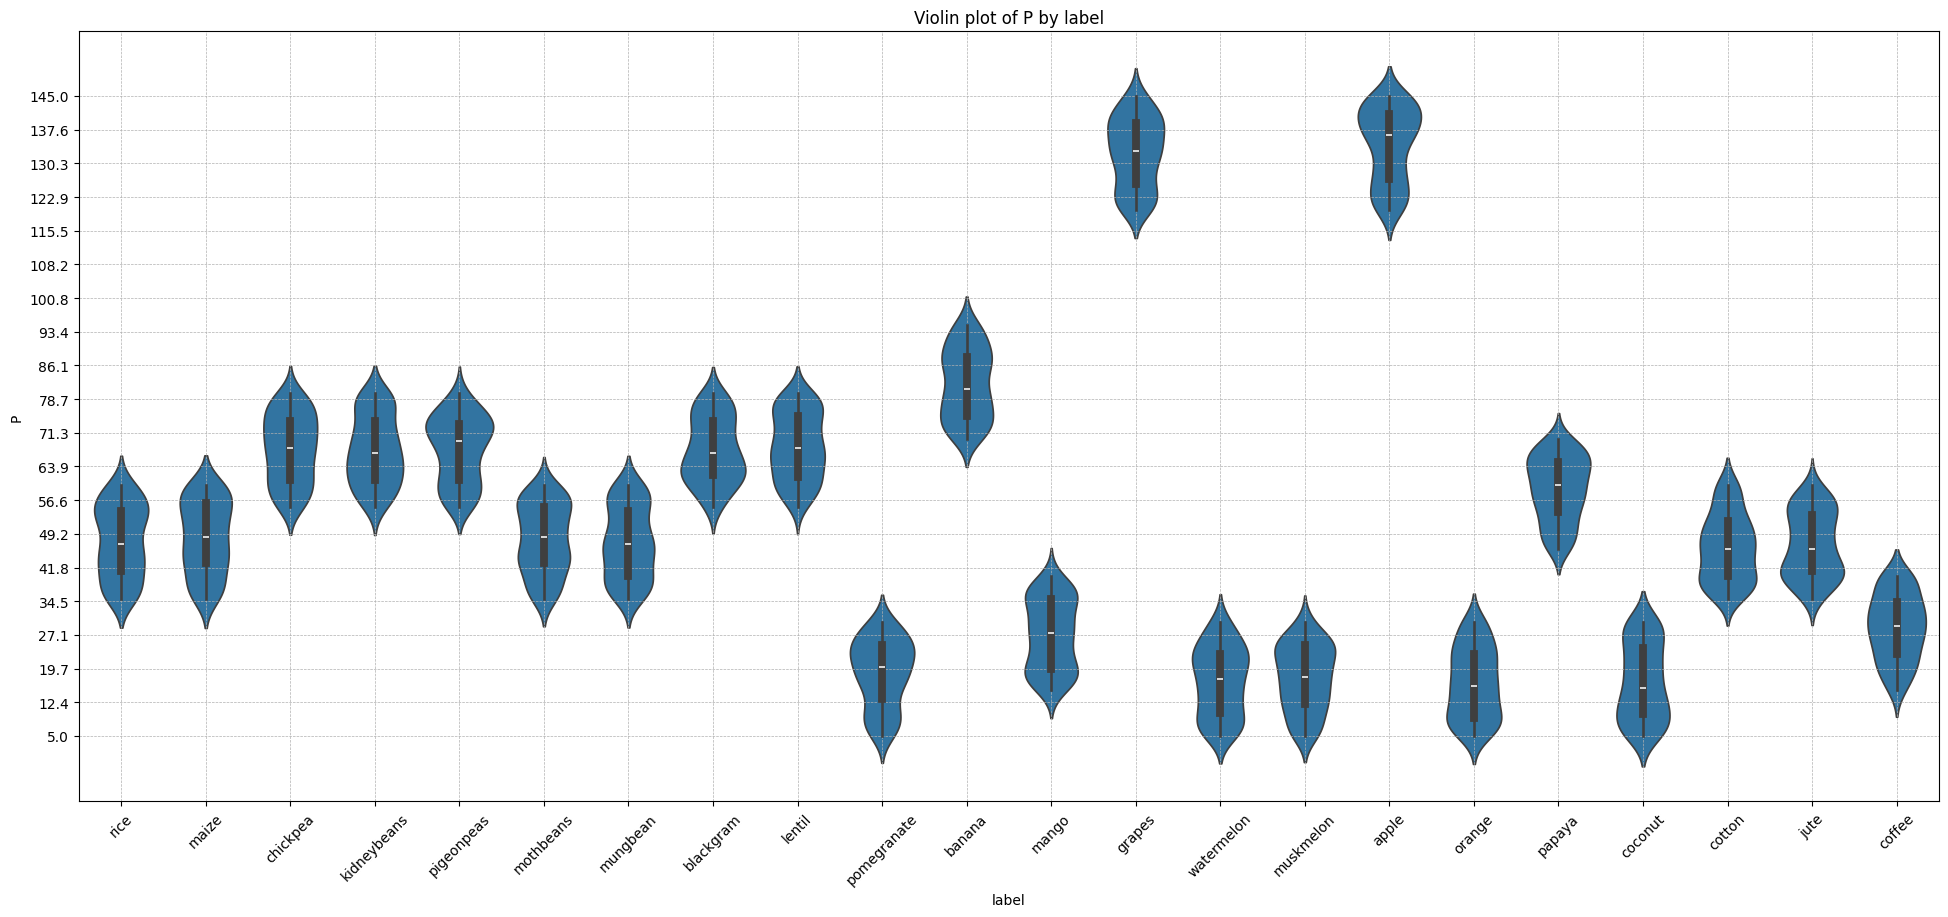

In [325]:
plt.figure(figsize=(24, 10))  
sns.violinplot(x=df['label'], y=df['P'])
plt.title('Violin plot of P by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['P'].min(), df['P'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see only 2 labels are above 108 
>  - those are grapes and apple 

### <span style="color:#00cd16; font-weight:bold">K by label</span>

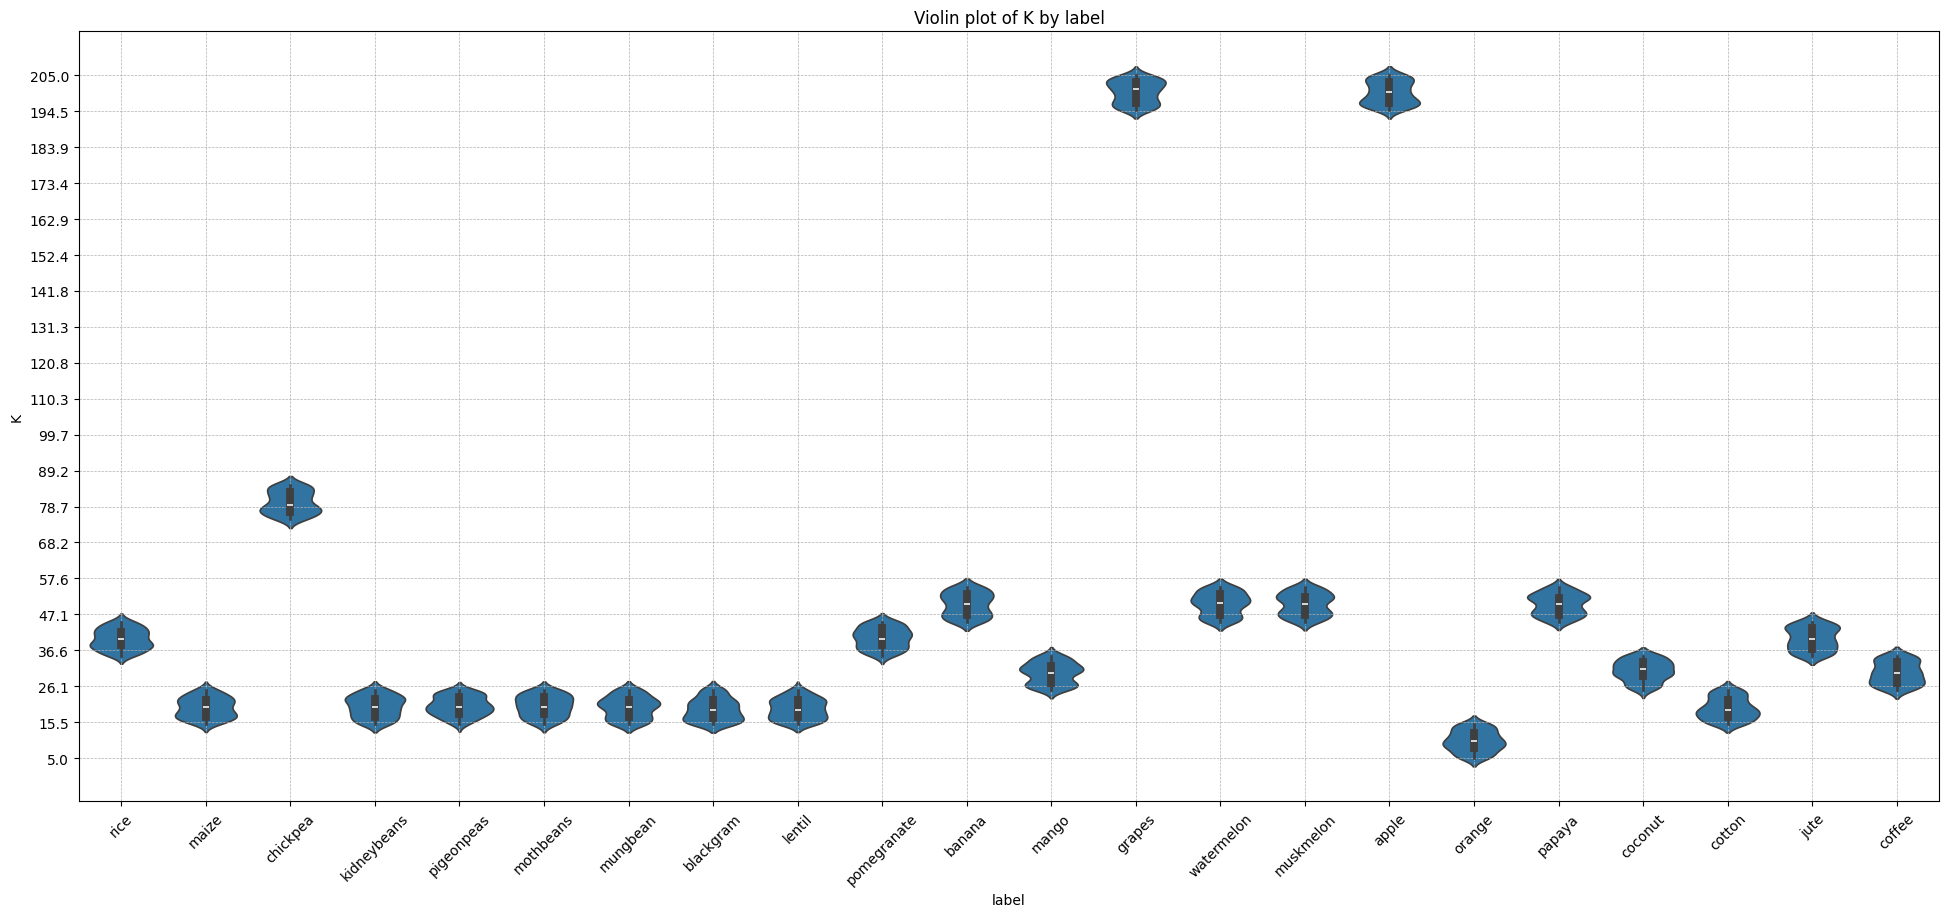

In [326]:
plt.figure(figsize=(24, 10))  
sns.violinplot(x=df['label'], y=df['K'])
plt.title('Violin plot of K by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['K'].min(), df['K'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see only 2 labels are above 180
>  - those are grapes and apple
>  - others are below 90 
>  - kidneybeans, pigeonpeas, mothbean, mugbean, blackgram, lentil has same K range
>  - also watermelon and muskmelon and papaya, banana has same K range
>  - also Rice and pomegrante and jute has same K range
>  - chickpea might be able identify by K value 

### <span style="color:#00cd16; font-weight:bold">temperature by label</span>

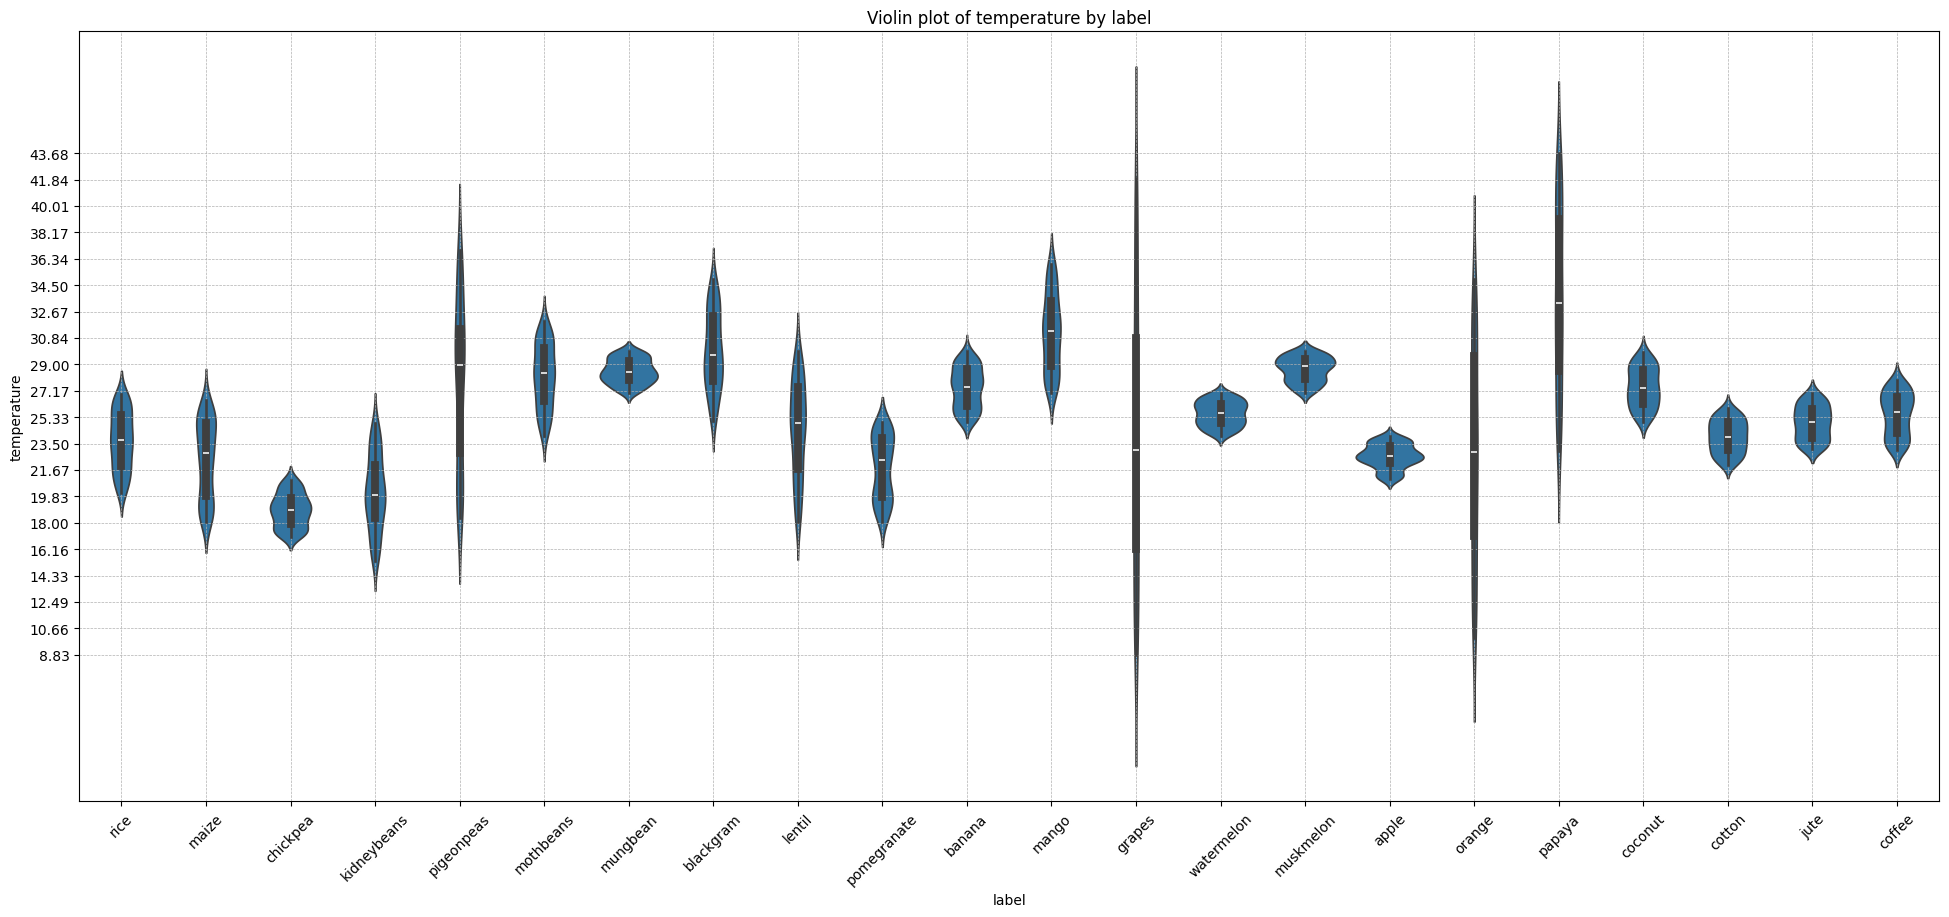

In [327]:
plt.figure(figsize=(24, 10)) 
sns.violinplot(x=df['label'], y=df['temperature'])
plt.title('Violin plot of temperature by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['temperature'].min(), df['temperature'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see grapes orange has a similer wide range of temperature
>  - also pigenonpeas and papaya has similer distribution
>  - others has small range of temperature

### <span style="color:#00cd16; font-weight:bold">humidity by label</span>

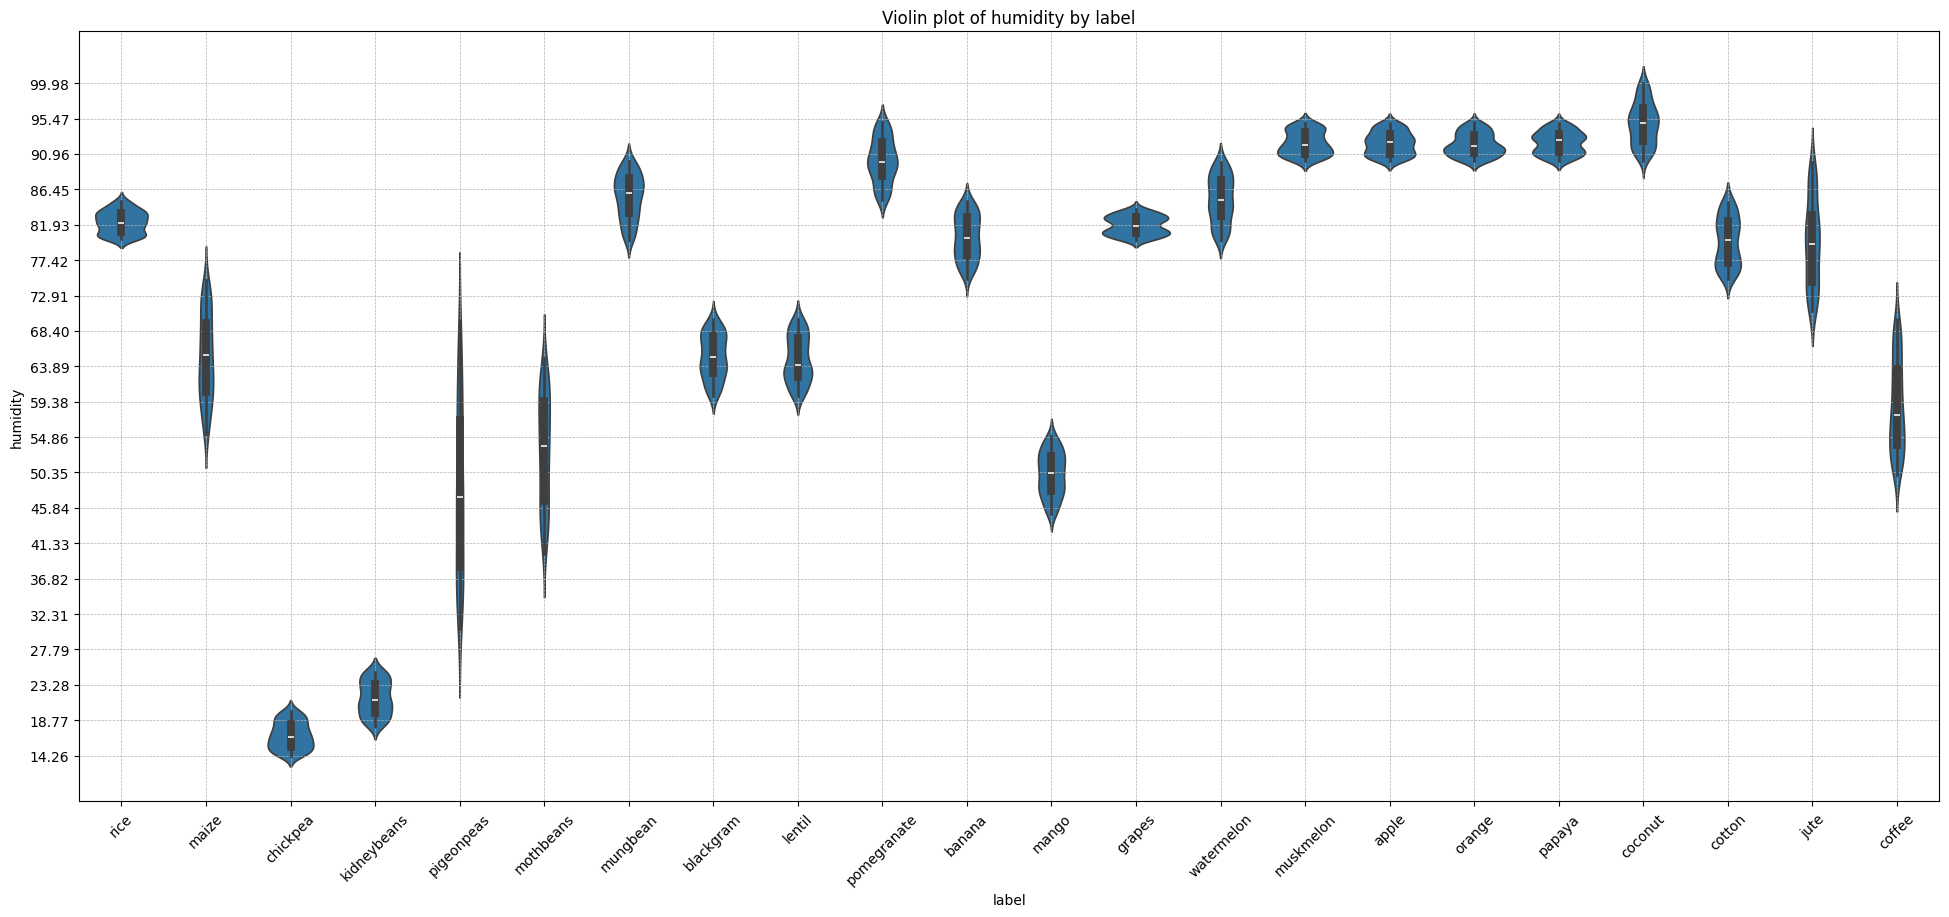

In [328]:
plt.figure(figsize=(24, 10))  
sns.violinplot(x=df['label'], y=df['humidity'])
plt.title('Violin plot of humidity by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['humidity'].min(), df['humidity'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see pigeonpeas wide range of humidity
>  - muskmelon, apple, orange and papaya has same humidity range
>  - also blackgram and lentil has same humidity range

### <span style="color:#00cd16; font-weight:bold">ph by label</span>

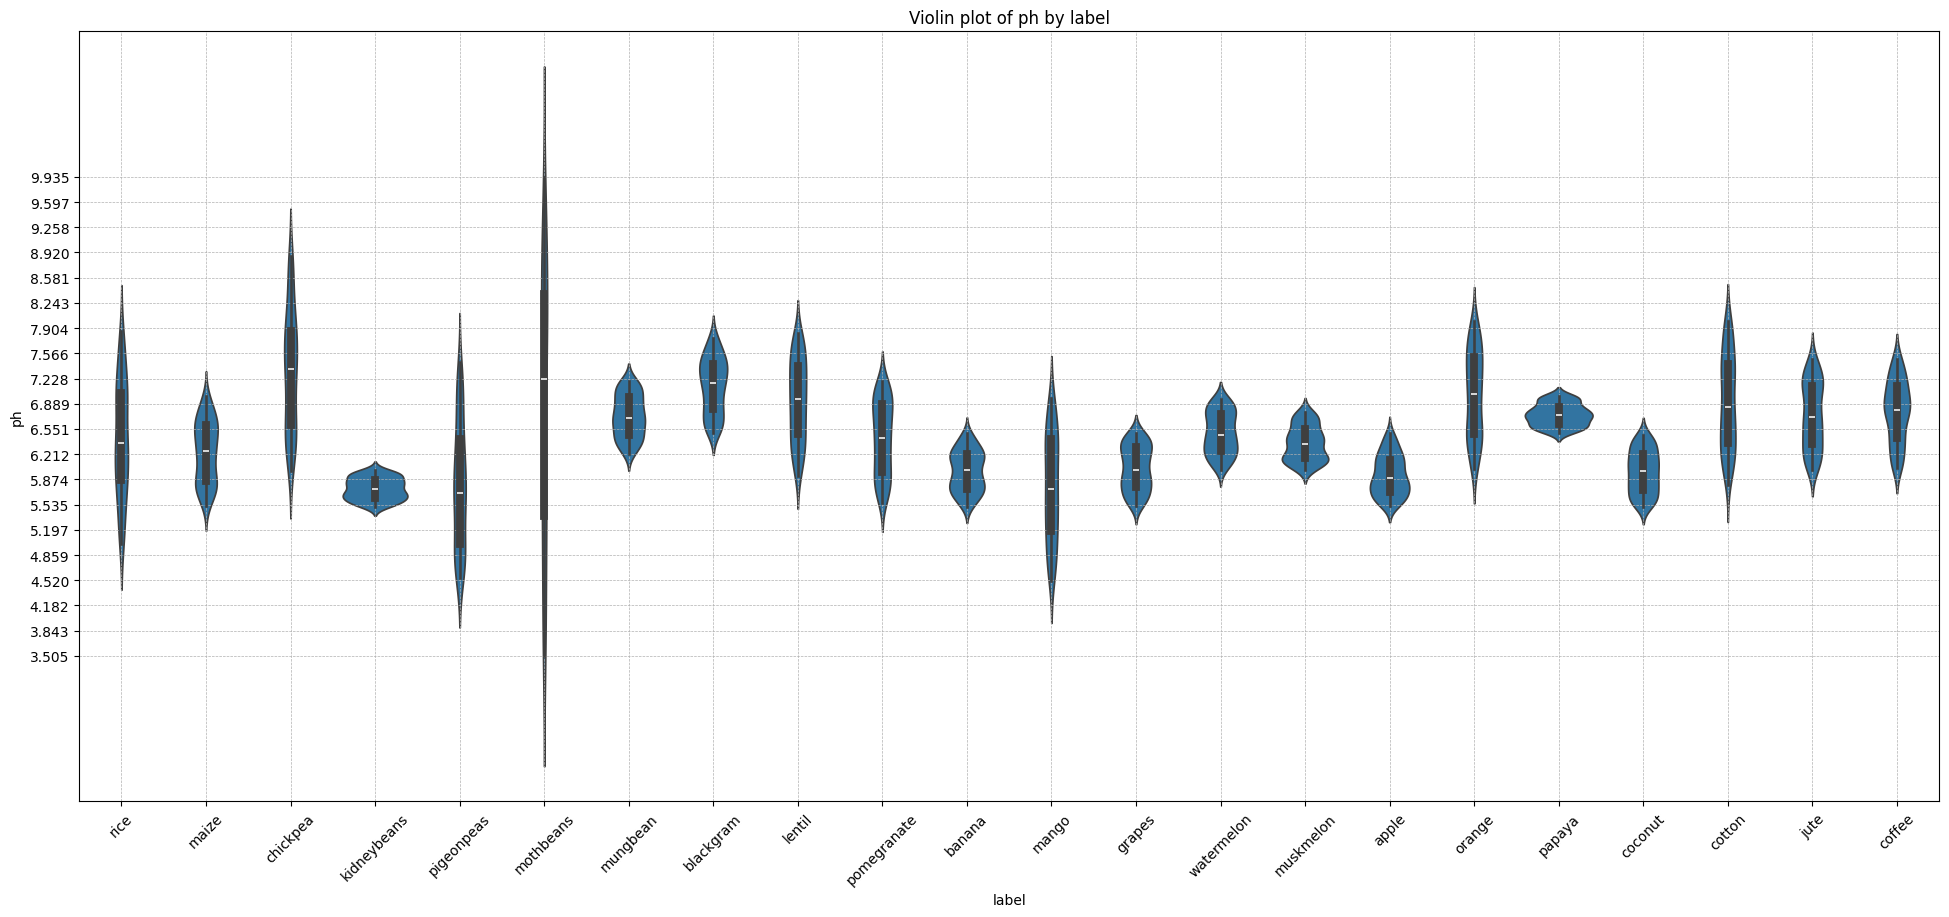

In [329]:
plt.figure(figsize=(24, 10))
sns.violinplot(x=df['label'], y=df['ph'])
plt.title('Violin plot of ph by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['ph'].min(), df['ph'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see mothbeans has a wide range of ph of soil
>  - others has small alsmost range of ph of soil

### <span style="color:#00cd16; font-weight:bold">rainfall by label</span>

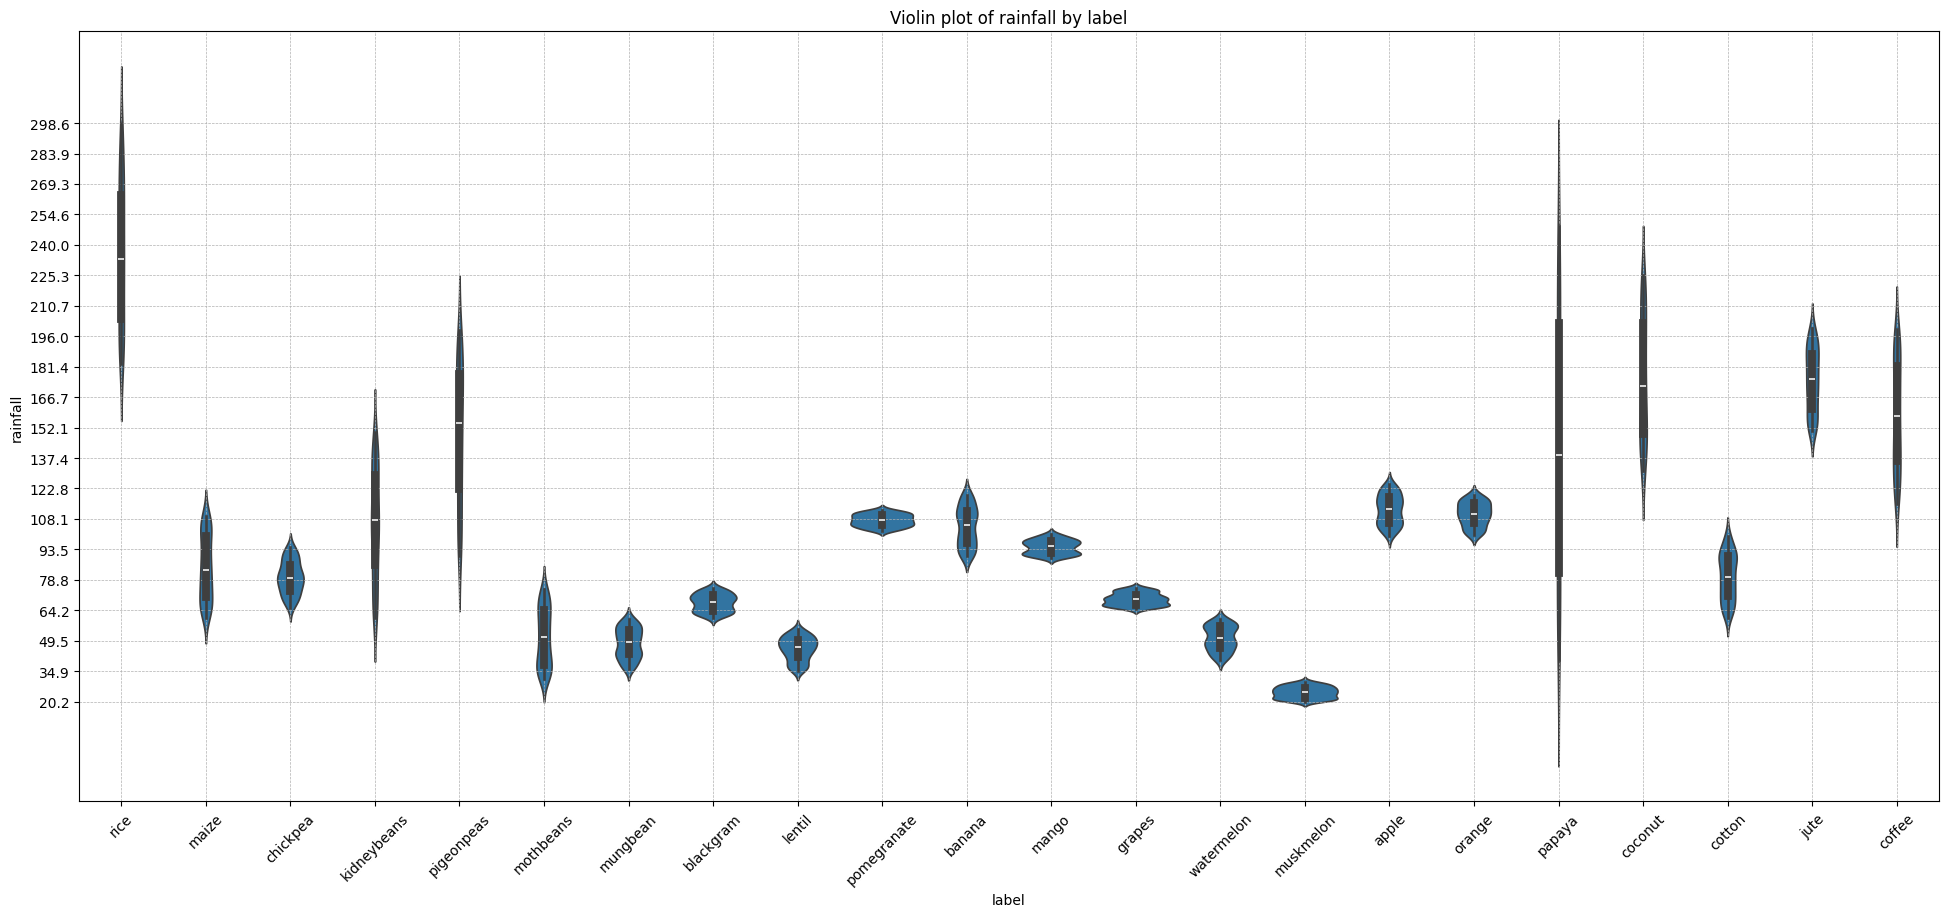

In [330]:
plt.figure(figsize=(24, 10)) 
sns.violinplot(x=df['label'], y=df['rainfall'])
plt.title('Violin plot of rainfall by label') 
plt.xticks(rotation=45) 

# Add more ticks to the y-axis
y_min, y_max = df['rainfall'].min(), df['rainfall'].max()
plt.yticks(np.linspace(y_min, y_max, num=20))  

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - As you can see there can be see papaya has a wide range of rainfall
>  - others has small alsmost range of rainfall
>  - apple, orange has same rainfall range


## <span style="color:#0076cd; font-weight:bold">other columns wise analysis</span>

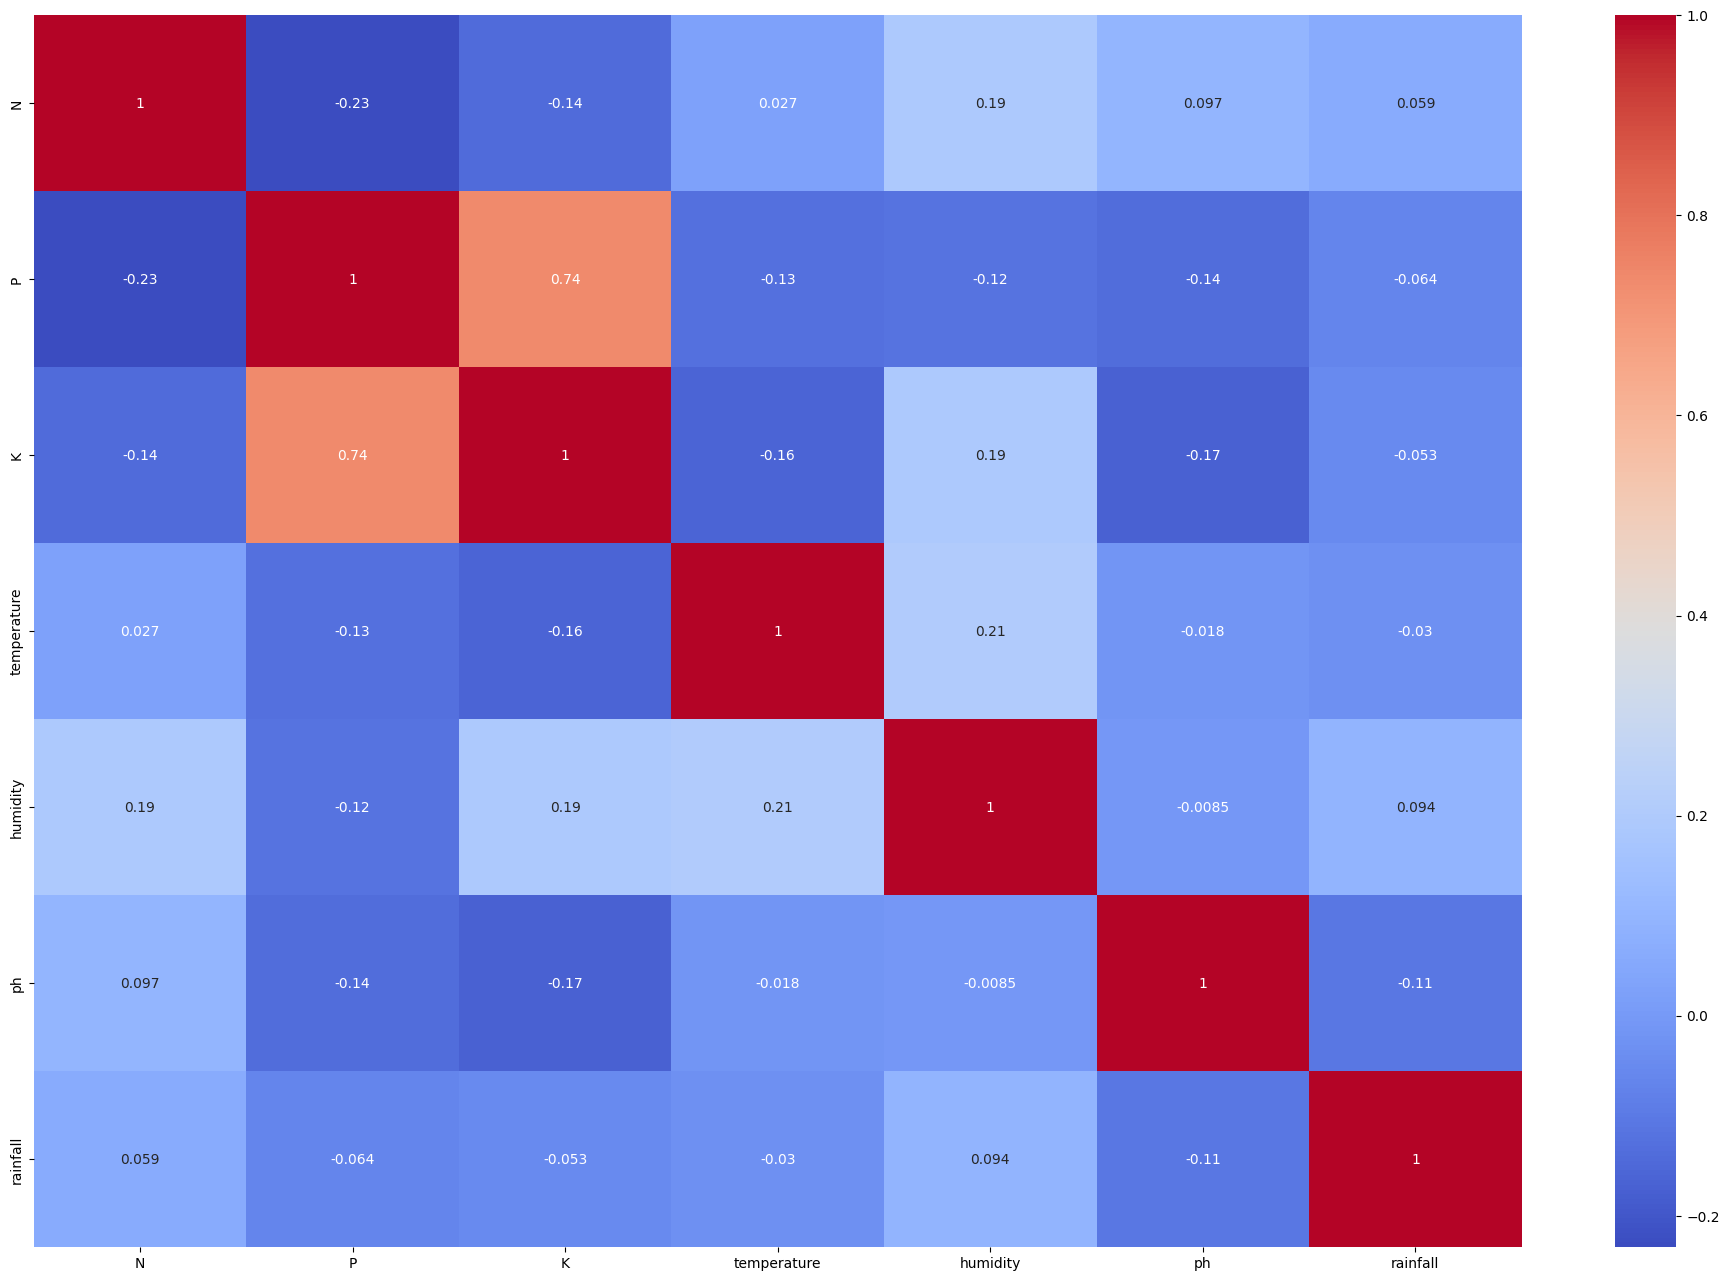

In [331]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(24, 16)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

>  <span style="color:skyblue"><strong>Note:</strong></span>
>  - No clear relationship each other except P and K
>  - P and k has 74% simileritie

> - #### these Relationships can be measure using a heat map. before it do that should do one-hot encoding for labels
 

# <span style="color:#cd0057; font-weight:bold">🛠️Step 8: Feature Eng</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">Onehot encoding</span>

In [332]:
df2 = pd.get_dummies(df, columns=['label'] , drop_first=True, dtype=int)
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label_banana,label_blackgram,label_chickpea,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### <span style="color:#0076cd; font-weight:bold">label wise analysis using heatmap</span>

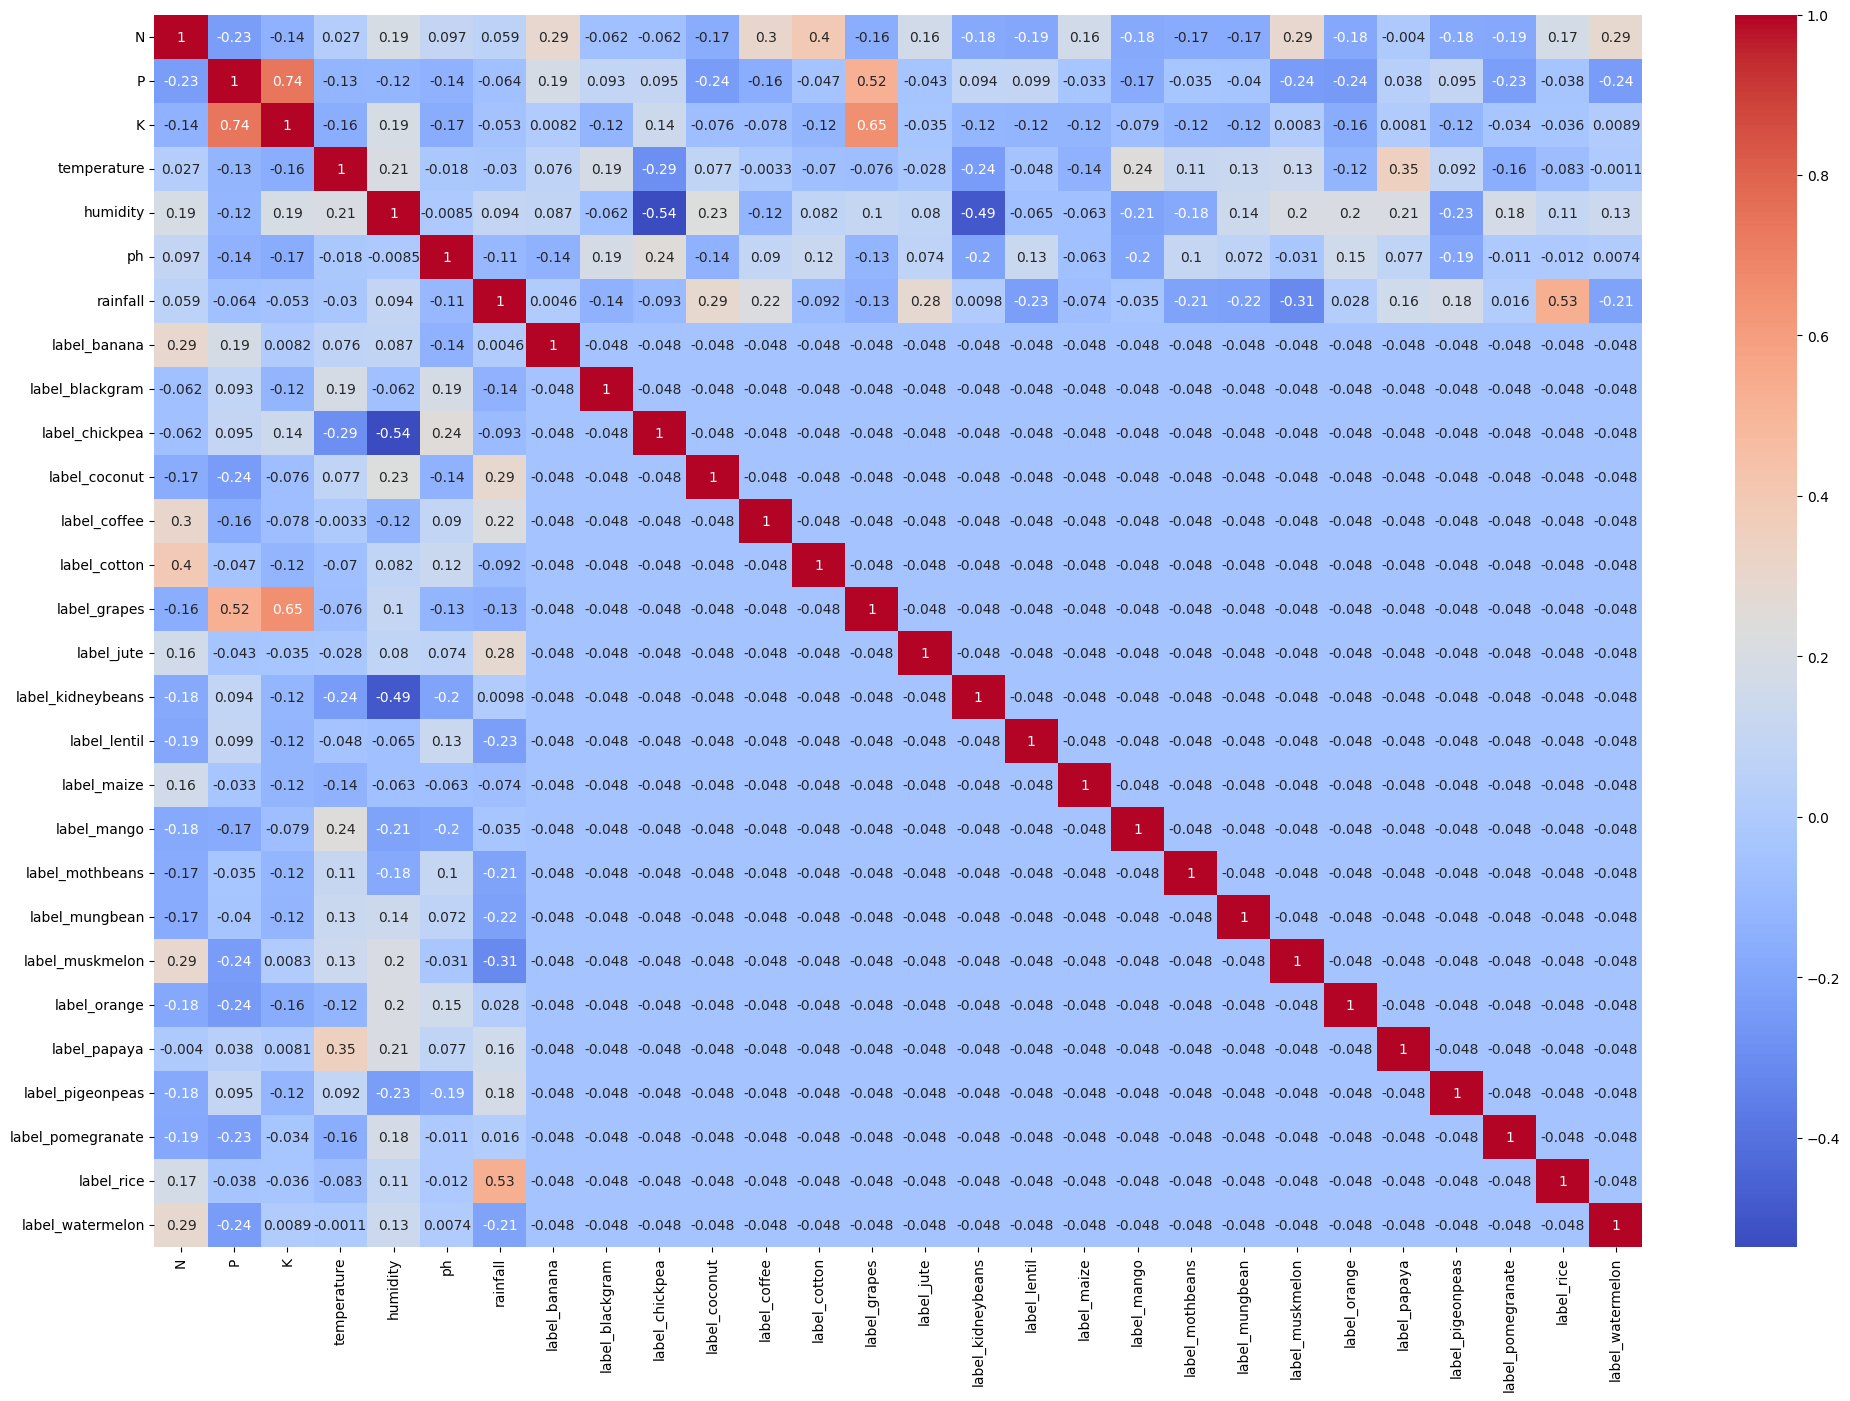

In [333]:
plt.figure(figsize=(24, 16)) 
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.show()

>  #### <span style="color:skyblue"><strong>Note:</strong></span>
>  - this heatmap shows all the relations amongs all the features.
>  - But i only want to see label's relation with 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'

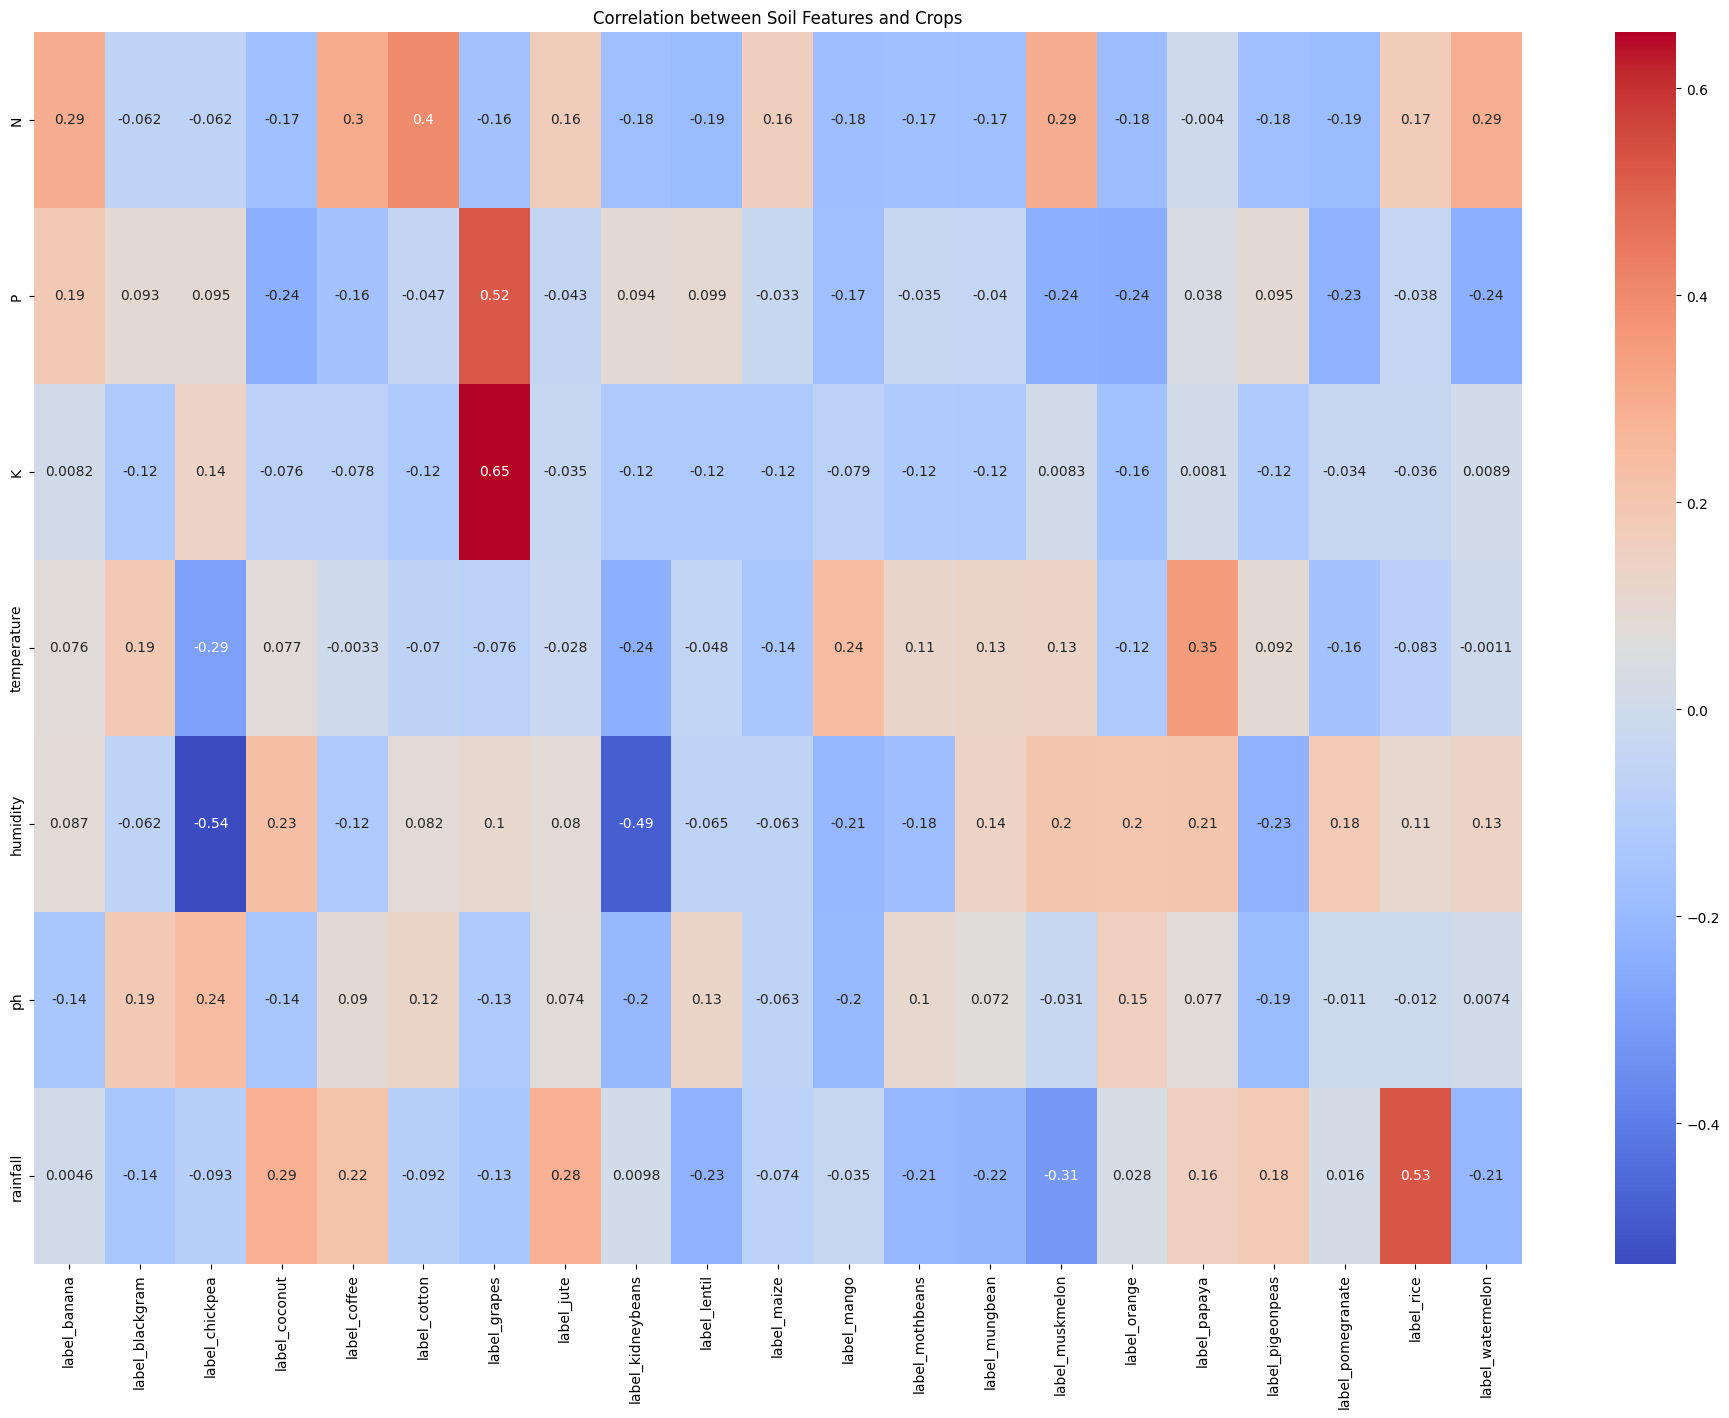

In [334]:
# Calculate the correlation matrix
corr = df2.corr()

# Define the feature columns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Automatically select all one-hot encoded label columns
label_columns = [col for col in df2.columns if col.startswith('label_')]

# Select the correlation values between features and label columns
selected_corr = corr.loc[features, label_columns]

# Plot the heatmap
plt.figure(figsize=(24, 16)) 
sns.heatmap(selected_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Soil Features and Crops')
plt.show()


>  #### <span style="color:skyblue"><strong>Note:</strong></span>
>  - As I expected, `banana`, `muskmelon`, and `watermelon` have similar positive correlation with `Nitrogen (N)` (~0.29), suggesting they require similar nitrogen levels.
>
>  - `Coffee` and `cotton` both show similar correlations with `Phosphorus (P)` (0.094) and `Potassium (K)` (-0.12), indicating potentially similar soil nutrient needs.
>  - `Blackgram` has a strong negative correlation with `temperature` (~-0.29), meaning it may prefer cooler climates.
>  - `Papaya` and `orange` have moderately positive correlations with `temperature`, suggesting they may thrive in warmer conditions.
>  - `Pigeonpeas` and `mungbean` have negative correlations with `humidity`, while `banana` shows a weak positive one—implying different moisture preferences.
>  - `Rice` shows the highest positive correlation with `rainfall` (~0.53), indicating it relies heavily on wet conditions.
>  - `Mothbeans` and `mungbean` both have negative correlation with `rainfall`, meaning they likely grow better in drier climates.

### <span style="color:#0076cd; font-weight:bold">label encoding for modeling</span>

In [335]:
from sklearn.preprocessing import LabelEncoder

In [336]:
df3 = df.copy()
le = LabelEncoder()
df3['label'] = le.fit_transform(df3['label'])

# <span style="color:#cd0057; font-weight:bold">🤖Step 9: Modeling</span>
<hr>

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [338]:
X = df3.drop('label', axis=1)
y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:#0076cd; font-weight:bold">Random Forest Classifier</span>

In [339]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Convert predicted numbers back to crop labels
predicted_labels = le.inverse_transform(y_pred)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9931818181818182


# <span style="color:#cd0057; font-weight:bold">⬇️ Step10: save model</span>
<hr>

In [340]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'



# <span style="color:#cd0057; font-weight:bold">📜 Conclusion</span>
<hr>


# ✅ Project Conclusion: Crop Recommendation Using Machine Learning

This project successfully analyzed and modeled crop recommendations based on soil nutrients and environmental conditions. Below are the key findings and insights:

## 🔍 1. Exploratory Data Analysis (EDA)
- The dataset was clean and balanced, requiring no significant preprocessing.
- Key features (`N`, `P`, `K`, `temperature`, `humidity`, `ph`, `rainfall`) were analyzed label-wise to detect unique patterns and distributions.
- Clear value groupings were observed — e.g., banana, muskmelon, and watermelon had similar nitrogen requirements; apple and grapes showed high P and K values.
- Some crops like mothbeans showed a wide range in pH, and crops like papaya had a wide rainfall range.
- Pairwise feature relationships revealed that `P` and `K` had a 74% similarity.

## 🛠️ 2. Feature Engineering
- One-hot encoding was used for label-wise correlation heatmap visualization.
- Label encoding was used to prepare categorical labels for model training.
- Strong correlations between crop labels and specific features were identified.

## 📊 3. Correlation Insights
- `Banana`, `muskmelon`, `watermelon`: similar nitrogen requirements.
- `Coffee`, `cotton`: similar P and K patterns.
- `Blackgram`: negative correlation with temperature — prefers cooler climates.
- `Papaya`, `orange`: positive correlation with temperature — warmer conditions preferred.
- `Pigeonpeas`, `mungbean`: negative correlation with humidity.
- `Rice`: strong positive correlation with rainfall (~0.53).
- `Mothbeans`, `mungbean`: negative correlation with rainfall — suited for drier climates.

## 🤖 4. Modeling
- Random Forest Classifier was used for training.
- Achieved **accuracy of 99.3%**, confirming excellent performance for crop recommendation.
- Feature scaling was not necessary due to the tree-based nature of the model.

## 💡 5. Key Insights
- Crops can be clearly grouped based on feature ranges.
- The heatmap and label-wise plots provided actionable insights for selecting crops suited to specific environments.
- Visual patterns helped identify similar crops and optimize land usage accordingly.

## 🚀 6. Future Work
- Introduce more features such as soil type, crop resistance, or location-specific factors.
- Build a user-facing web app or mobile tool to allow farmers to input data and receive instant crop recommendations.
- Extend the model to include multi-crop suitability ranking or planting schedules.

---

This project demonstrates the real-world potential of data science in agriculture by supporting smart, sustainable, and precise crop planning using environmental data.
